
<center><b><font color=green>Group - 7 Predict & Identify Diseases</font> </b></center> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import norm
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
raw_data = pd.read_csv('/Users/rahulneelakantam/Downloads/heart.csv')
data = raw_data.copy()
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

#### Missing Data Check

In [4]:
def draw_missing_data_table(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
draw_missing_data_table(data)

,Total,Percent
HeartDisease,0,0.0
BMI,0,0.0
KidneyDisease,0,0.0
Asthma,0,0.0
SleepTime,0,0.0
GenHealth,0,0.0
PhysicalActivity,0,0.0
Diabetic,0,0.0
Race,0,0.0
AgeCategory,0,0.0


In [5]:
columns = data.columns.values
columns

array(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex',
       'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer'], dtype=object)

#### Checking for data inconsisitency in categorical data

In [6]:
for i in columns:
    print(data[i].unique())

['No' 'Yes']
[16.6  20.34 26.58 ... 62.42 51.46 46.56]
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
[ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
['No' 'Yes']
['Female' 'Male']
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
['Yes' 'No']
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
[ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']


* Data is normal and no further pre-processing of categorical data is required

#### Creating variables for numerical and categorical variables for further analysis

In [7]:
data_numerical = data[['BMI','PhysicalHealth', 'MentalHealth','SleepTime']]
data_categorical = data[['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
        'DiffWalking', 'Sex',
       'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer']]

#### Categorical Data Exploration

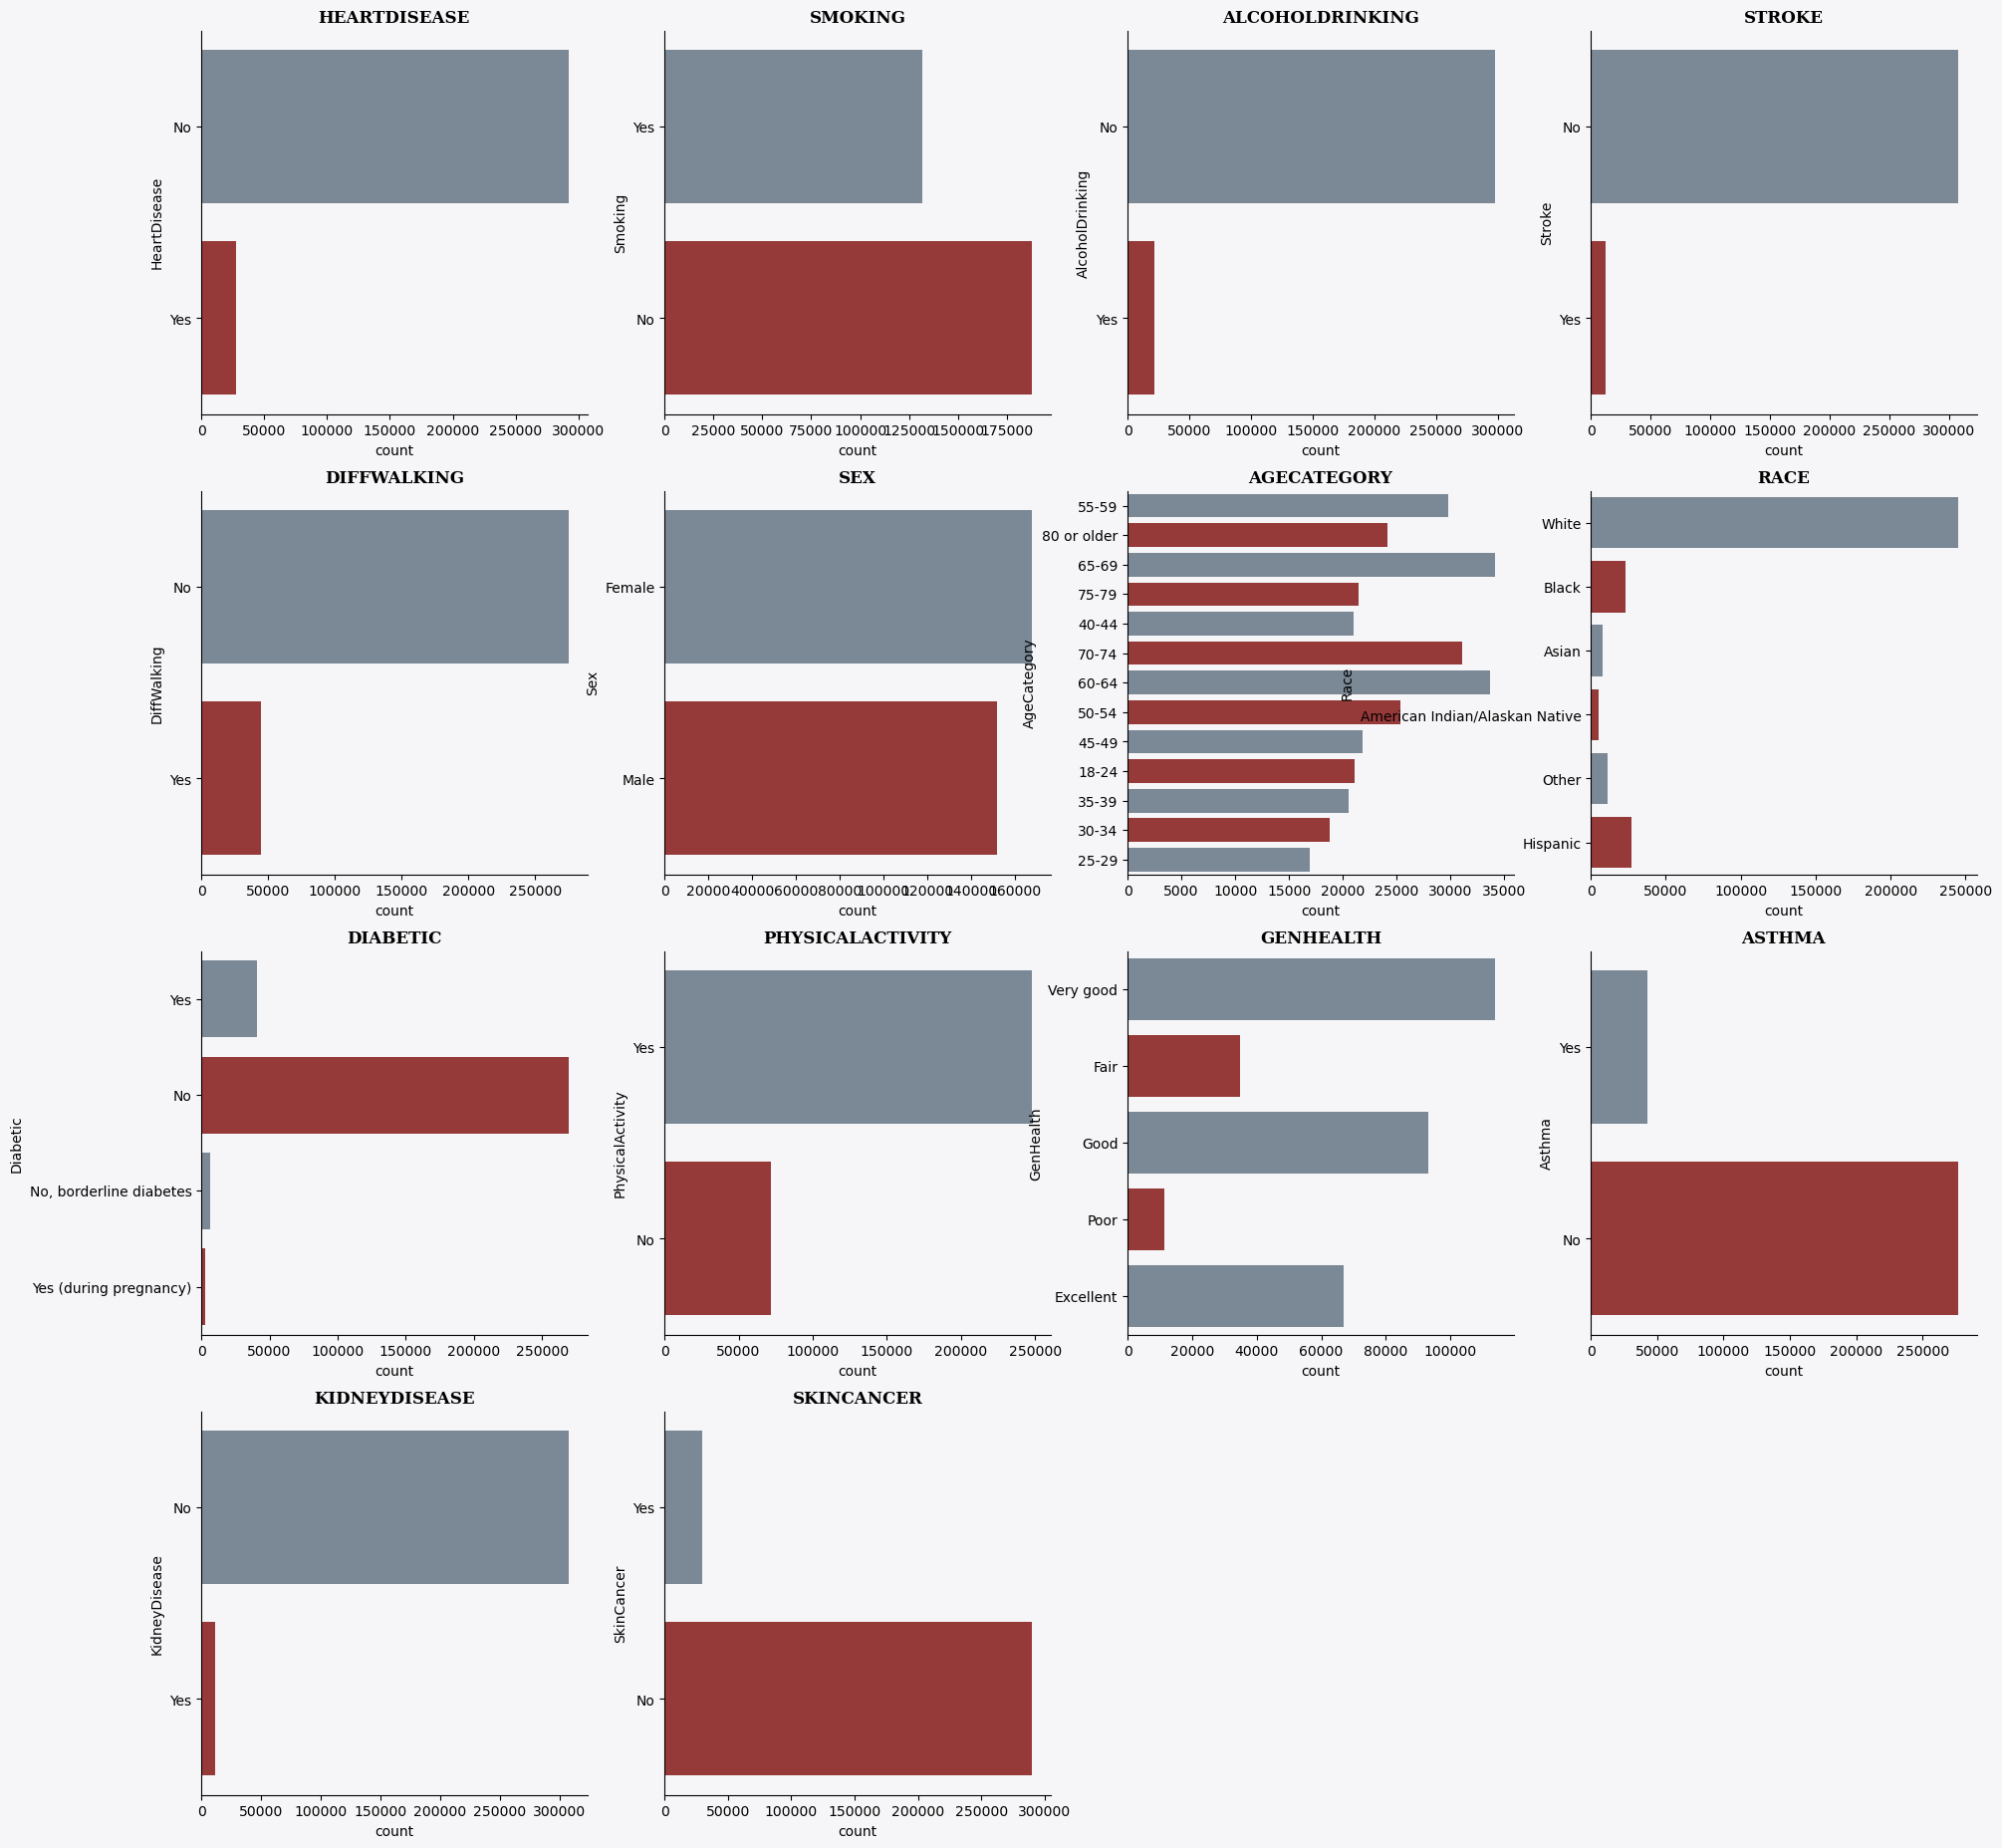

In [8]:
fig=plt.figure(figsize=(23,23))
colors=['lightslategrey','brown']
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(data_categorical.columns):
    ax=plt.subplot(4,4,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val.upper(),fontweight='bold',fontfamily='serif')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':',axis='y')
    sns.countplot(y=data_categorical[val],palette=colors)

#### Categorical Data Exploration wrt Heart Disease

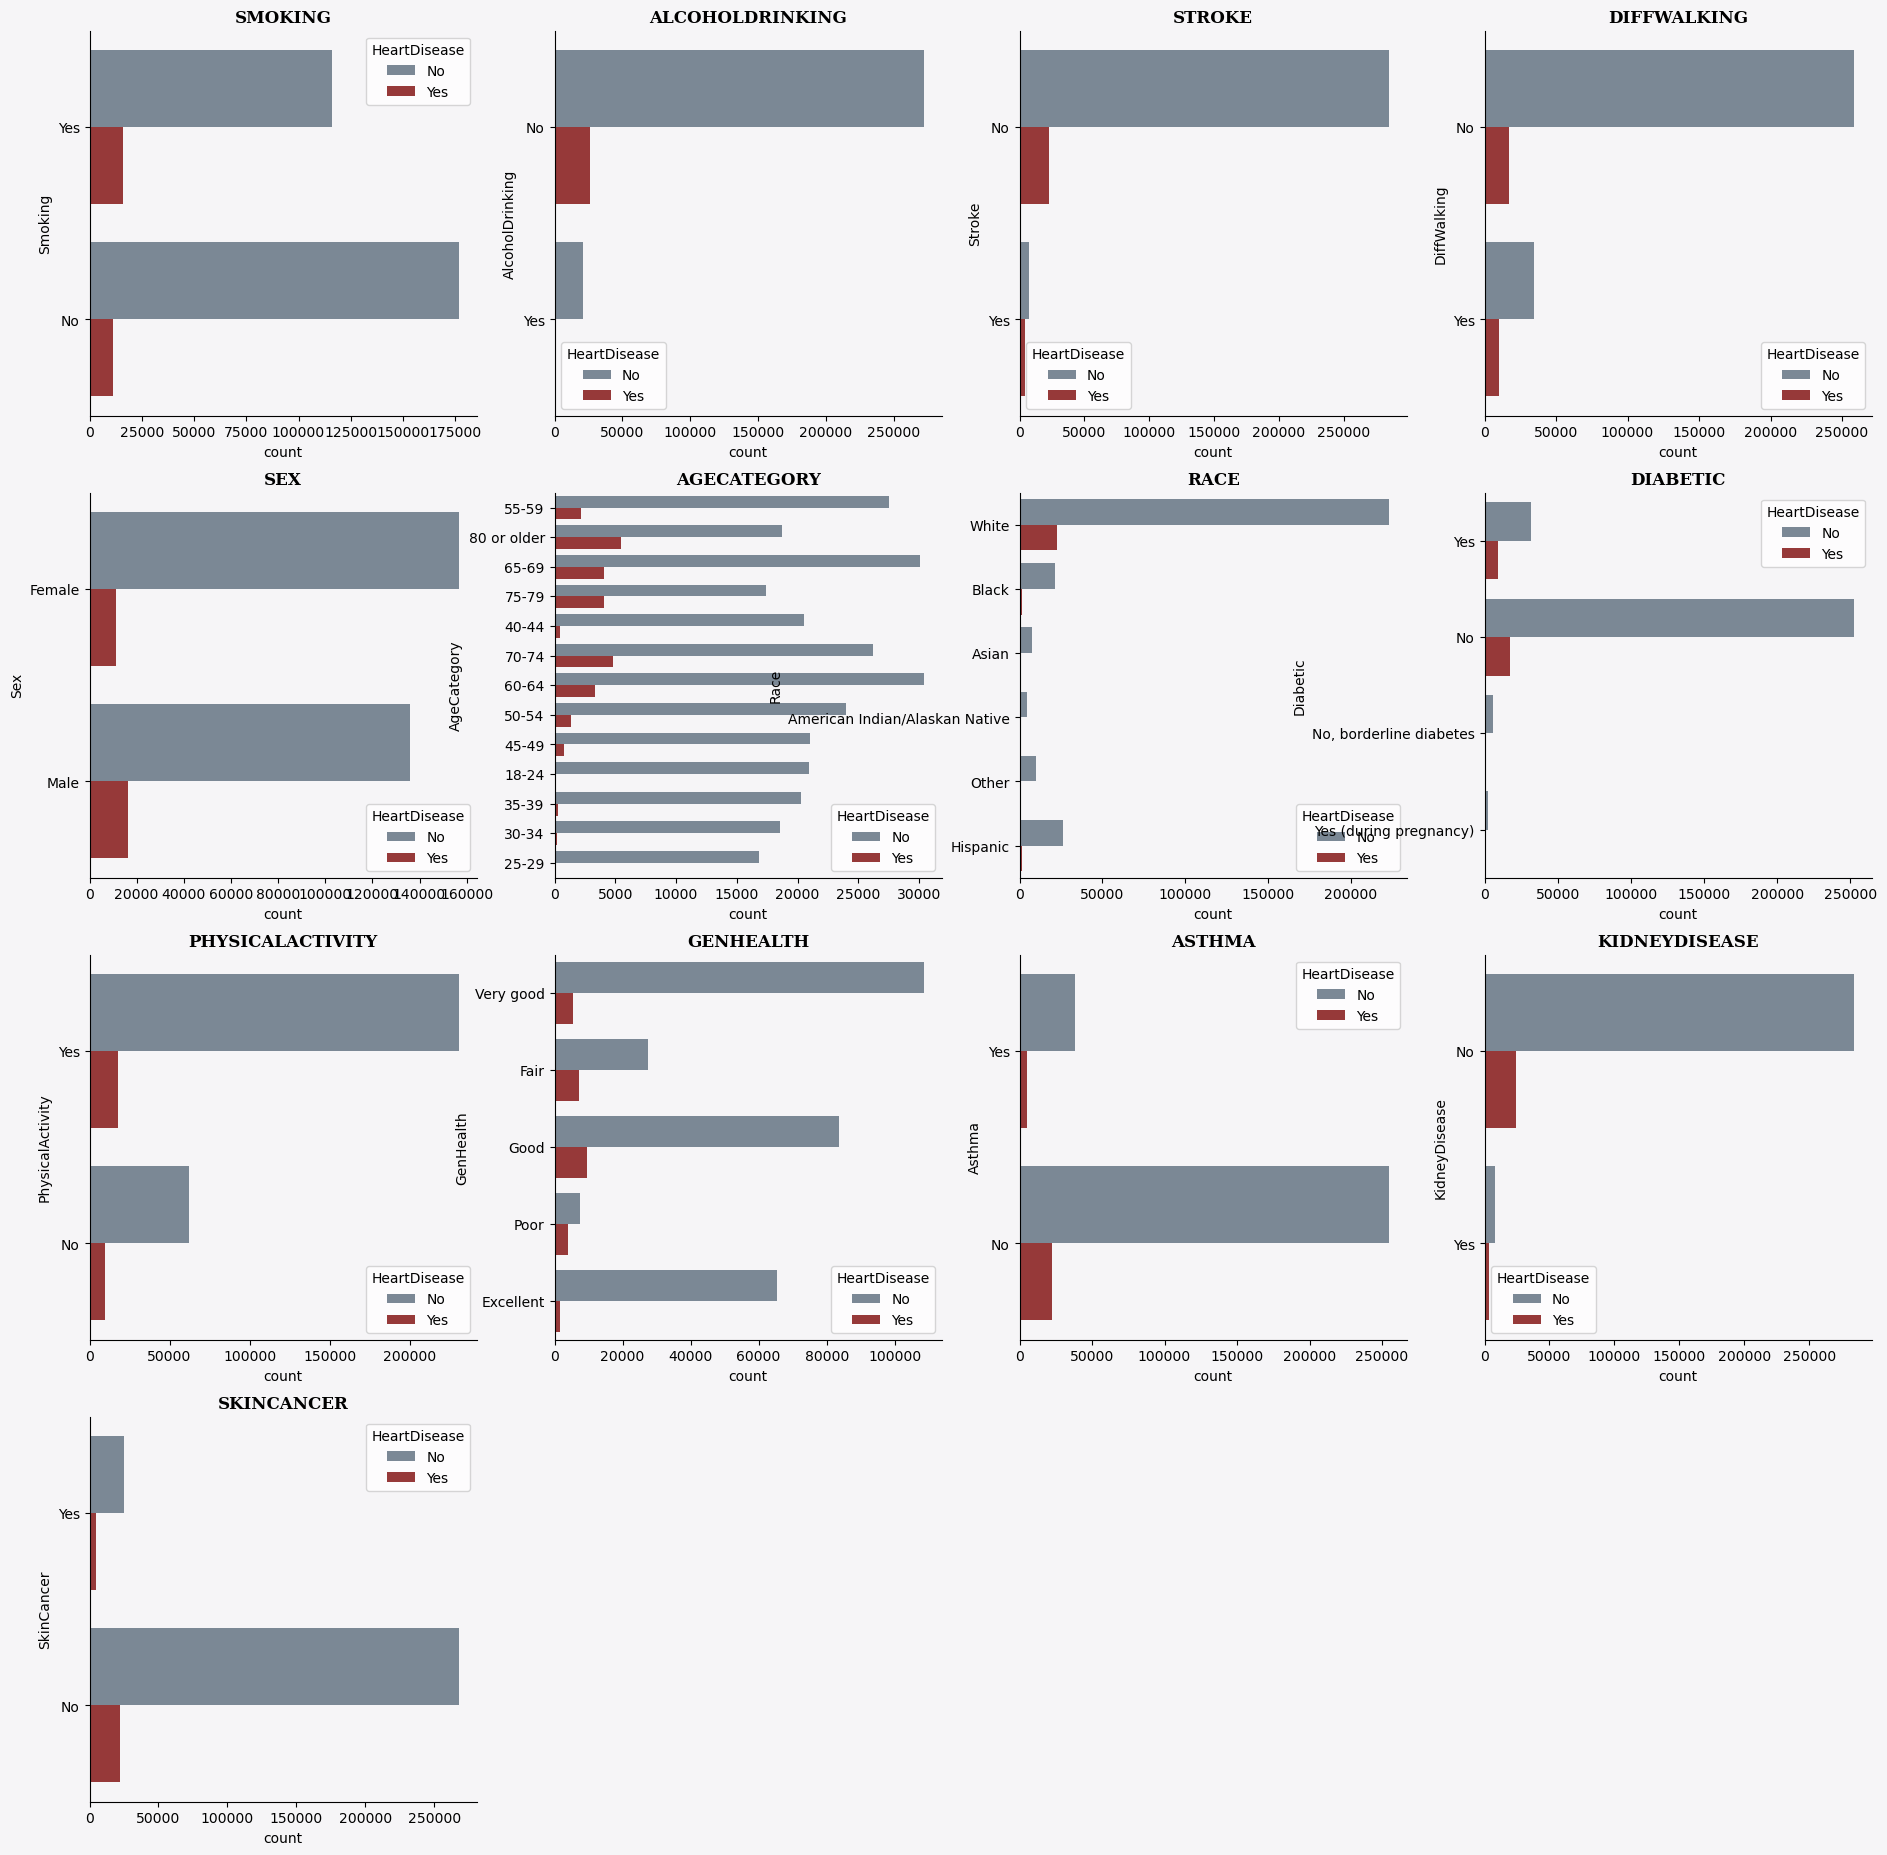

In [9]:
data_cat = data[['Smoking', 'AlcoholDrinking', 'Stroke',
        'DiffWalking', 'Sex',
       'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer']]
fig=plt.figure(figsize=(23,23))
colors=['lightslategrey','brown']
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(data_cat.columns):
    ax=plt.subplot(4,4,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val.upper(),fontweight='bold',fontfamily='serif')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':',axis='y')
    sns.countplot(y=data_cat[val],palette=colors,hue = data['HeartDisease'])

#### Which age group is more susceptible to heart disease and how does smoking affect the occurence of heart disease?

In [10]:
q1 = data.groupby(by=['AgeCategory','Smoking','HeartDisease'])['Stroke'].count().reset_index()
q1.rename(columns = {'Stroke':'Count'}, inplace = True)
q1


,AgeCategory,Smoking,HeartDisease,Count
0,18-24,No,No,17682
1,18-24,No,Yes,98
2,18-24,Yes,No,3252
3,18-24,Yes,Yes,32
4,25-29,No,No,11727
5,25-29,No,Yes,74
6,25-29,Yes,No,5095
7,25-29,Yes,Yes,59
8,30-34,No,No,11488
9,30-34,No,Yes,93


#### Relationship between smoking and heart disease

<AxesSubplot:xlabel='Smoking', ylabel='count'>

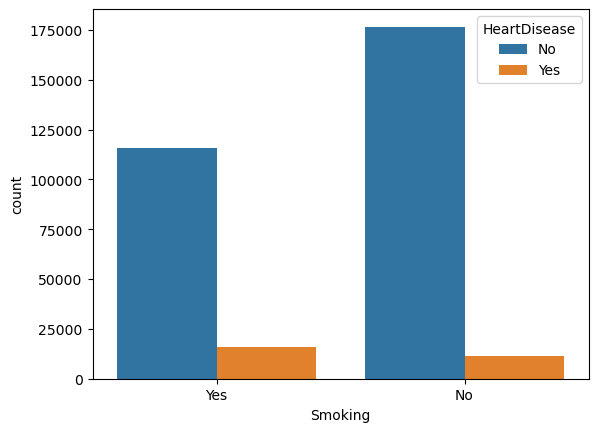

In [11]:
sns.countplot(x=data['Smoking'],hue=data['HeartDisease'])

#### How is BMI and Physical Health affecting Heart disease?

<AxesSubplot:xlabel='BMI', ylabel='PhysicalHealth'>

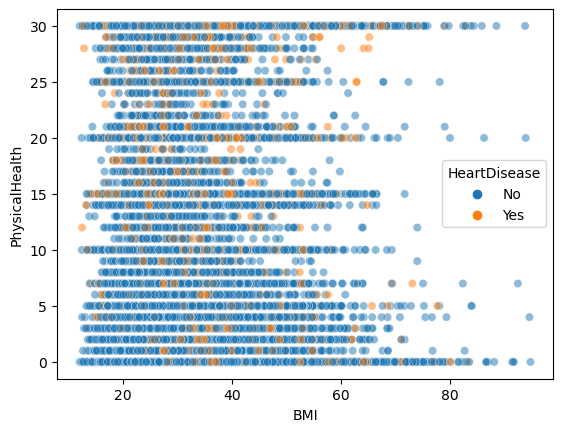

In [12]:
sns.scatterplot(x=data['BMI'],y=data['PhysicalHealth'],hue=data['HeartDisease'],alpha =0.5)

#### Exploring Numerical Variables

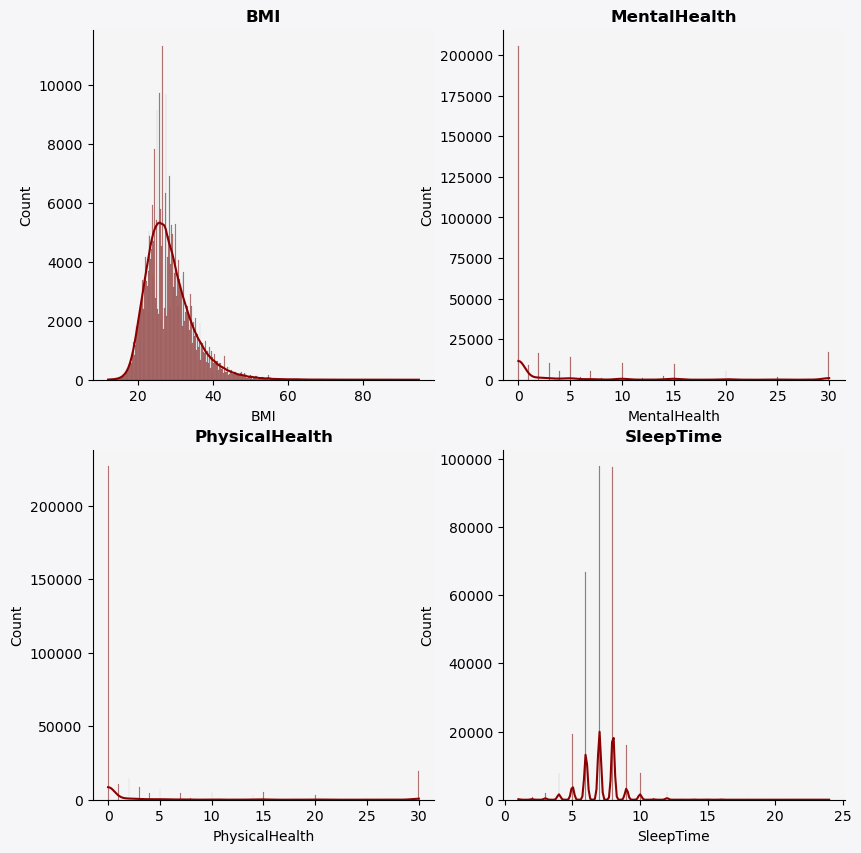

In [13]:
fig,ax=plt.subplots(2,3,figsize=(15,10))
fig.patch.set_facecolor('#f6f5f7')
for i,idx in enumerate(data_numerical.columns):
    sns.histplot(ax=ax[i%2,i//2],x=data_numerical[idx],color='darkred',kde=True,alpha=0.5)
    ax[i%2,i//2].set_title(idx,fontweight='bold')
    ax[i%2,i//2].set_facecolor('#f6f5f5')
    for z in ["top","right"]:
        ax[i%2,i//2].spines[z].set_visible(False)
ax[1,2].set_visible(False)
ax[0,2].set_visible(False)

#### Correlation between numerical variables

<AxesSubplot:>

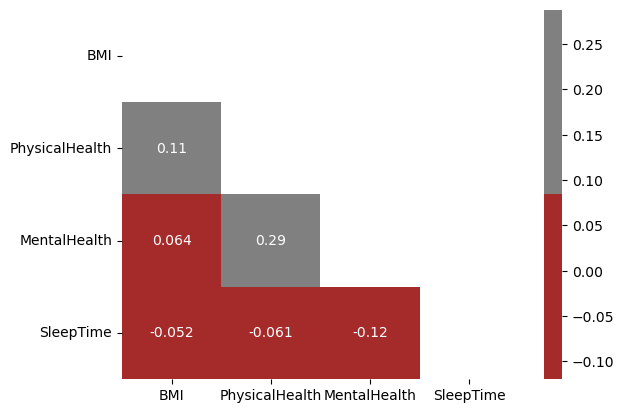

In [14]:
matrix = np.triu(data_numerical.corr())
colors=['brown','grey']
sns.heatmap(data=data_numerical.corr(), annot=True, mask=matrix,cmap=colors)

#### Data Preprocessing

In [15]:
# Before training the models we are going to drop the slope and target columns.
data_target=data['HeartDisease']
data.drop(columns=['HeartDisease'],inplace=True)

# One-Hot encoding of Categorical Variables
data_dummies=data_cat
data_dummies= pd.get_dummies(data_dummies,columns=['Smoking', 'AlcoholDrinking', 'Stroke',
        'DiffWalking', 'Sex',
       'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer'])

In [16]:
data.drop(columns=['Smoking', 'AlcoholDrinking', 'Stroke',
        'DiffWalking', 'Sex',
       'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer'],inplace=True)
data=data.merge(data_dummies,left_index=True, right_index=True,how='left')

#Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,data_target,test_size=0.25,random_state=0)

# Standardizing our training and testing data
                
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[['BMI','PhysicalHealth','MentalHealth','SleepTime']] = scaler.fit_transform(x_train[['BMI','PhysicalHealth','MentalHealth','SleepTime']])
x_test[['BMI','PhysicalHealth','MentalHealth','SleepTime']] = scaler.fit_transform(x_test[['BMI','PhysicalHealth','MentalHealth','SleepTime']])

### Rebalancing the Original Data
* Using SMOTE Overbalancing technique because the amount of "YES" occurence in the dataset is extremely low and the machine learning model will be biased towards "NO" occurence which results in an increase of False Negatives.


In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=4)
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())

In [18]:
x_train_columns = x_train.columns.values
x_train_columns

array(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Smoking_No',
       'Smoking_Yes', 'AlcoholDrinking_No', 'AlcoholDrinking_Yes',
       'Stroke_No', 'Stroke_Yes', 'DiffWalking_No', 'DiffWalking_Yes',
       'Sex_Female', 'Sex_Male', 'AgeCategory_18-24', 'AgeCategory_25-29',
       'AgeCategory_30-34', 'AgeCategory_35-39', 'AgeCategory_40-44',
       'AgeCategory_45-49', 'AgeCategory_50-54', 'AgeCategory_55-59',
       'AgeCategory_60-64', 'AgeCategory_65-69', 'AgeCategory_70-74',
       'AgeCategory_75-79', 'AgeCategory_80 or older',
       'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White', 'Diabetic_No',
       'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'PhysicalActivity_No',
       'PhysicalActivity_Yes', 'GenHealth_Excellent', 'GenHealth_Fair',
       'GenHealth_Good', 'GenHealth_Poor', 'GenHealth_Very good',
       'Asthma_No', 'Asthma_Yes', 'KidneyDis

#### Function for Model Training, Testing and Evaluating

In [19]:
# https://towardsdatascience.com/model-evaluation-techniques-for-classification-models-eac30092c38b
from matplotlib import pyplot
def Model(model):
    model.fit(x_train,y_train)
    score = model.score(x_test, y_test)
    model_train_score = model.score(x_train, y_train)
    model_test_score = model.score(x_test, y_test)
    prediction = model.predict(x_test)
    cm = confusion_matrix(y_test,prediction)
    
    # Sensitivity
    tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
    sensitivity = tp / (tp+fn)
    
    print('Testing Accuracy',score)
    print('Sensitivity ',sensitivity)
    
    plot_confusion_matrix(model,x_test,y_test,cmap="OrRd")
    
    # Area Under the Curve
    metrics.plot_roc_curve(model, x_test, y_test) 
    if model ==lg_reg:
    # Feature Importance
        importance = model.coef_[0]
        df = pd.DataFrame(columns =['Feature','Values'])
        # summarize feature importance
        imp = pd.DataFrame(importance)
        imp['Features'] = x_train_columns
        #print(imp)
        plt.figure(figsize=(10,10))
        sns.barplot(y=imp['Features'],x=importance,palette= 'Blues_r')

### Logistic Regression

Testing Accuracy 0.8523183529500056
Sensitivity  0.4453904873752202


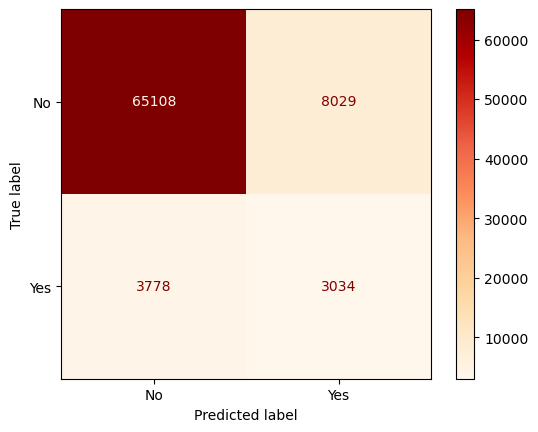

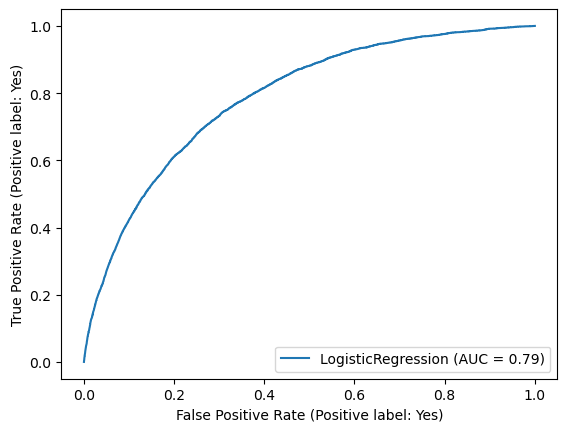

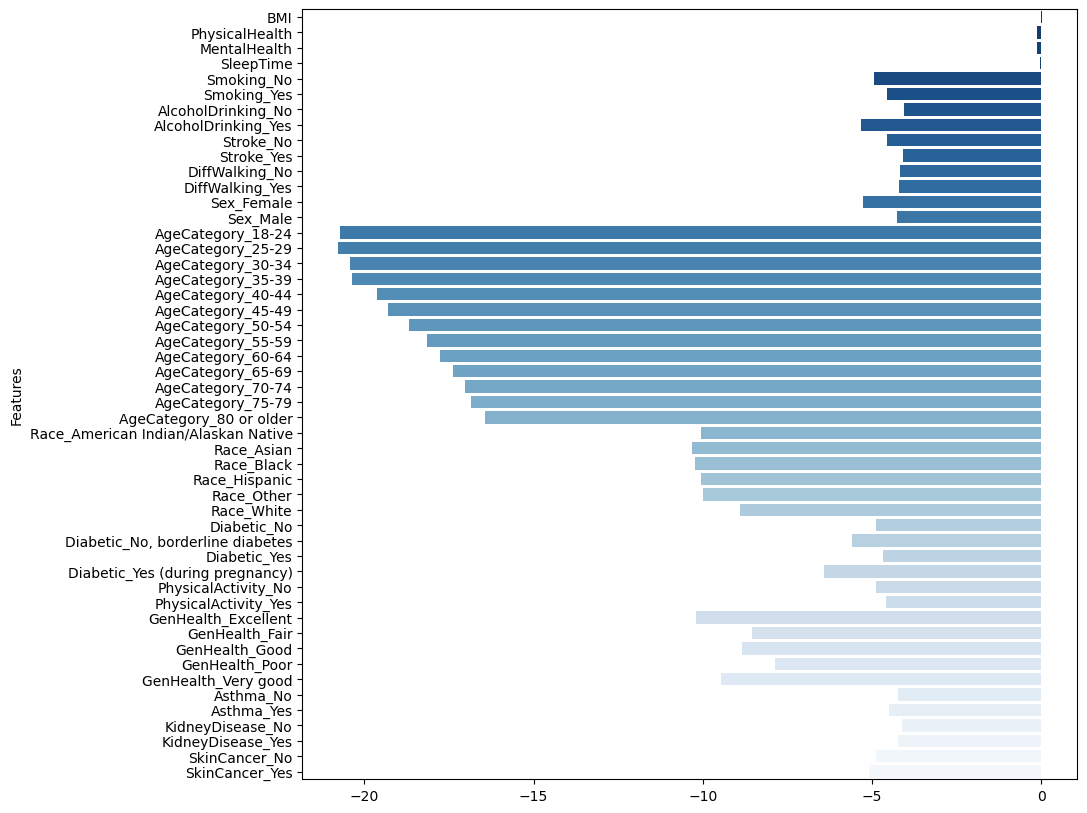

In [20]:
# Logistic Regression
lg_reg=LogisticRegression()
Model(lg_reg)

### Decision Tree Model

Testing Accuracy 0.6297264506122653
Sensitivity  0.5640046975924838


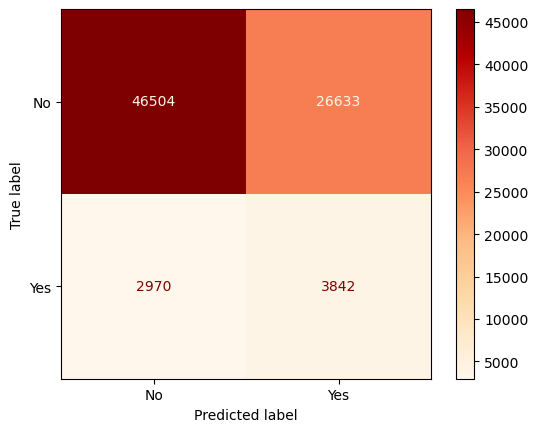

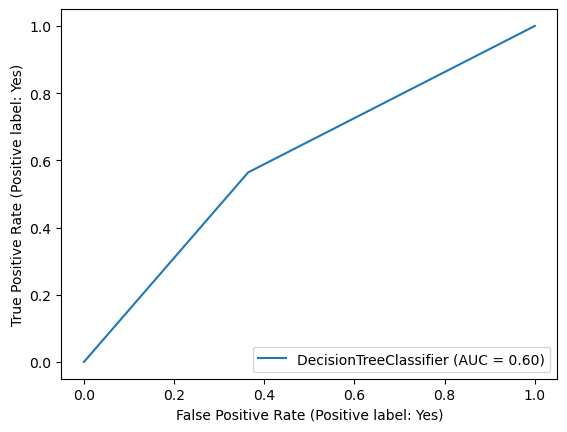

In [21]:
# Decision Tree Classification
d_classif= DecisionTreeClassifier()
Model(d_classif)